In [34]:
from textblob import TextBlob
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
import re
import string
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
import plotly.express as px

In [35]:
consumerKey = "Gw955dOCZx2KAzTJ9gIBb2CPu"
consumerSecret = "Ki2h2mGfVK5pKUESd2y2By4WcL7qJdKk1ZMIJg6wmno3qQLQyD"
auth = tweepy.AppAuthHandler(consumerKey, consumerSecret)

In [36]:
api = tweepy.API(auth)

In [53]:
search_term = '$PLTR'
n_tweets = 120

In [54]:
tweets = tweepy.Cursor(api.search, q=search_term).items(n_tweets)

In [55]:
t_tot = [tweet.text for tweet in tweets]
tweet_list = pd.DataFrame(t_tot)
tweet_list.drop_duplicates(inplace=True)

print('Tweets a analizar: ',len(tweet_list))


Tweets a analizar:  106


In [56]:
tweet_list['text'] = tweet_list[0]
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","  ",x)
tweet_list["text"] = tweet_list.text.map(remove_rt).map(rt)
tweet_list["text"] = tweet_list.text.str.lower()
tweet_list['text'].head(10)

0        dotbbk main ones for me right now are   nn...
1                     what do you think about   pltr  
2    some profits from today   ogi   optt   ostk   ...
3      alexswatchlist 2  4  2021    abus    solo   ...
4                                             pltr    
5      3  500 tomorrow what do i buy   amp   why   ...
6     still like   pltr   bullish outside today    ...
7                                                 pltr
8      pltr   0  91      kopn   16  81      ysg   3...
9         sunset   pltr remains in this 30  33 rang...
Name: text, dtype: object

In [57]:
tweet_list[['polarity', 'subjectivity']] = tweet_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweet_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
    tweet_list.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
    tweet_list.loc[index, 'sentiment'] = "positive"
 else:
    tweet_list.loc[index, 'sentiment'] = "neutral"
    tweet_list.loc[index, 'neg'] = neg
    tweet_list.loc[index, 'neu'] = neu
    tweet_list.loc[index, 'pos'] = pos
    tweet_list.loc[index, 'compound'] = comp
tweet_list[['text','polarity','subjectivity','sentiment']].head(10)

,text,polarity,subjectivity,sentiment
0,dotbbk main ones for me right now are nn...,0.22619,0.434524,neutral
1,what do you think about pltr,0.00000,0.000000,neutral
2,some profits from today ogi optt ostk ...,0.00000,0.000000,positive
3,alexswatchlist 2 4 2021 abus solo ...,0.00000,0.000000,neutral
4,pltr,0.00000,0.000000,neutral
5,3 500 tomorrow what do i buy amp why ...,-0.05000,0.400000,neutral
6,still like pltr bullish outside today ...,0.00000,0.050000,positive
7,pltr,0.00000,0.000000,neutral
8,pltr 0 91 kopn 16 81 ysg 3...,0.00000,0.000000,neutral
9,sunset pltr remains in this 30 33 rang...,0.00000,0.000000,neutral


In [58]:
tweet_list_negative = tweet_list[tweet_list["sentiment"]=="negative"]
tweet_list_positive = tweet_list[tweet_list["sentiment"]=="positive"]
tweet_list_neutral = tweet_list[tweet_list["sentiment"]=="neutral"]

In [59]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [60]:
res = count_values_in_column(tweet_list,"sentiment")
res

,Total,Percentage
neutral,56,52.83
positive,39,36.79
negative,11,10.38


In [61]:
sizes = res['Total'].to_list()
names = res.index.to_list()
title = 'Análisis de sentimiento para el término: ' + search_term

In [62]:
fig = px.pie(res, values=sizes, names=names, title=title ,color_discrete_sequence= px.colors.qualitative.Safe)
fig.show()

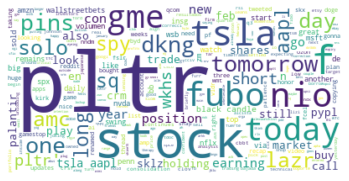

<Figure size 2880x2880 with 0 Axes>

In [63]:
stop_words = set(nltk.corpus.stopwords.words('english'))

wordcloud = WordCloud(stopwords=stop_words,max_words=3000 ,background_color="white", repeat=False).generate(str(tweet_list["text"].values))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(40,40))
plt.show(sizes)

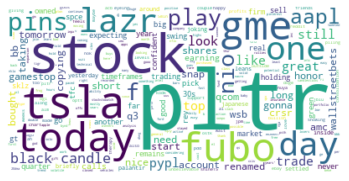

In [64]:
wordcloud = WordCloud(stopwords=stop_words,max_words=3000 ,background_color="white", repeat=False).generate(str(tweet_list_positive["text"].values))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

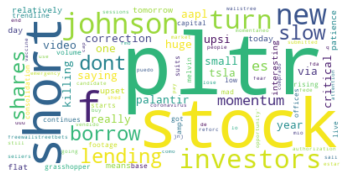

In [65]:
wordcloud = WordCloud(stopwords=stop_words,max_words=3000 ,background_color="white", repeat=False).generate(str(tweet_list_negative["text"].values))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

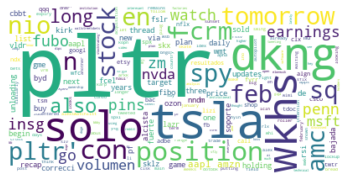

In [66]:
wordcloud = WordCloud(stopwords=stop_words,max_words=3000 ,background_color="white", repeat=False).generate(str(tweet_list_neutral["text"].values))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()